In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def plot(clf, X, y, C=0, show_vectors=False):

    plt.figure(figsize=(8,6.4))
    cmap = plt.cm.coolwarm
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]

    P = model.decision_function(temp).reshape(yy.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if(show_vectors):
        support_vectors = model.support_vectors_
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k') 
    
    if(C!=0):
        plt.title('C = ' + str(C))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

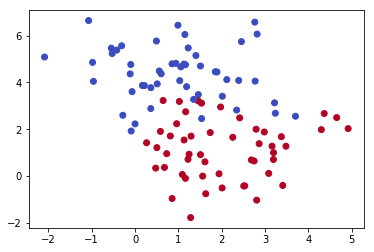

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

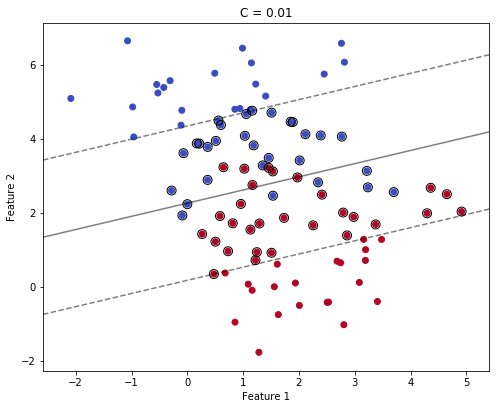

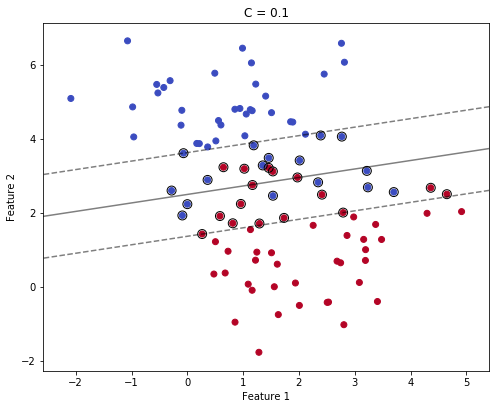

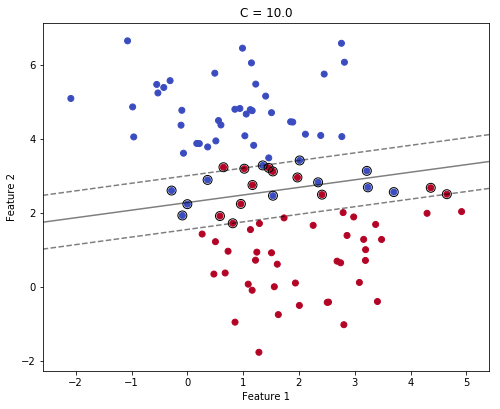

In [4]:
for C in ([0.01, 0.1, 10.0]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    plot(model, X, y, C, show_vectors=True)